# K-means clustering of section images
---

### Overview
A long long time ago we landed on RGB-HED color conversion as the best color transformation. But perhaps we can achieve even better segmentation results by quanitizing(?) the image with k-means clustering.

In [40]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.cluster import KMeans
from skimage import img_as_ubyte
from skimage import io, segmentation, exposure, color
import secdetect

In [65]:
# Collect filepaths
fps = list(Path('/Users/ryanlane/Documents/development/secdetect/_REPOSITORY/').glob('*.tif'))
fp = np.random.RandomState(None).choice(fps, 1)[0]

# Load image
image = io.imread(fp)
# Process
cw = 1536  # crop width
cy, cx, _ = [x//2 for x in image.shape]
image = image[cy-cw//2:cy+cw//2,
              cx-cw//2:cx+cw//2,:]

# Kmeans
n_colors = 3
kmeans = KMeans(n_clusters=n_colors)
X = image.reshape(-1, 3)
kmeans.fit(X)
# Extract centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
image_k = centers[labels].reshape(image.shape)[:,:,0]
image_k = (n_colors-1) * (image_k - image_k.min()) / \
                         (image_k - image_k.min()).max()

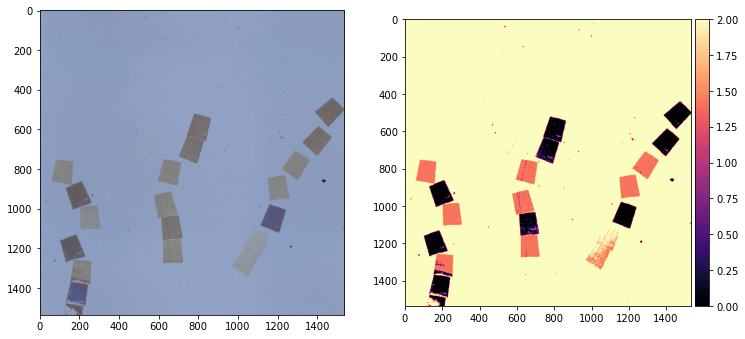

In [66]:
# Plot
ncols = 2
fig, axes = plt.subplots(ncols=ncols, figsize=(6*ncols, 6))
axes[0].imshow(image)
im = axes[1].imshow(image_k, cmap='magma')
# Colorbar
div = make_axes_locatable(axes[1])
cax = div.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')